In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fitness=pd.read_csv("fitness_class_2212.csv")

In [3]:
df_fitness.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [4]:
df_fitness.tail()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0
1499,1500,20,94.39,8,Thu,AM,Cycling,1


# EDA

## Check nan


In [5]:
df_fitness.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

Nan is `weight` type data numerical value 

So we can handling
Technic Handling use `Arbitary` <br>
find mean weight

In [7]:
filna_mean_weight=df_fitness["weight"].mean()
df_fitness["weight"]=df_fitness["weight"].fillna(filna_mean_weight)

In [8]:
df_fitness.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [32]:
df_fitness.describe(include=['O'])

,days_before,day_of_week,time,category
count,1500,1500,1500,1500
unique,31,10,2,6
top,10,Fri,AM,HIIT
freq,293,279,1141,667


In [30]:
df_fitness.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.680411,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.562500,0.000000
50%,750.500000,12.000000,81.035000,0.000000
75%,1125.250000,19.000000,89.382500,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [13]:
print("fitness day",df_fitness.day_of_week.unique())

fitness day ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']


In [37]:
df_fitness

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [70]:
fitness_member=df_fitness[df_fitness["months_as_member"]>11]
data_fitness_member=pd.DataFrame(fitness_member[["day_of_week","time","attended","category"]].value_counts()).reset_index().rename(columns={0:"total Category"})
data_fitness_member_attended_atleast_one=data_fitness_member[data_fitness_member["attended"]>0]

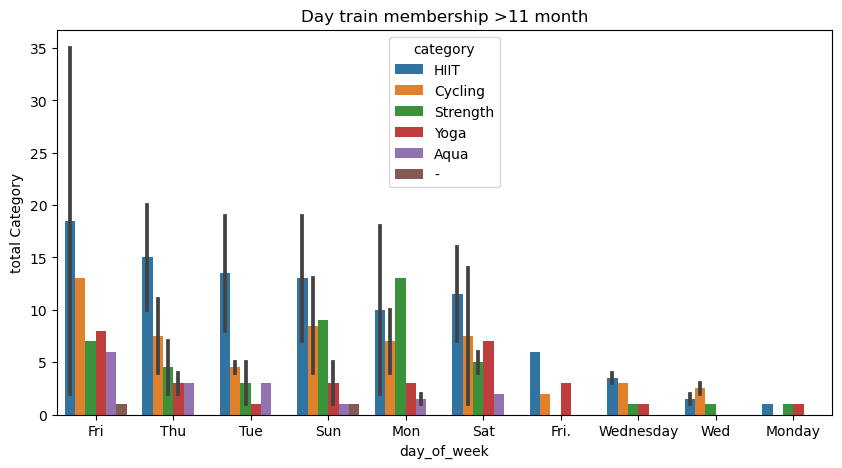

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_fitness_member_attended_atleast_one,x="day_of_week",y='total Category',hue='category')
plt.title("Day train membership >11 month")
plt.show()

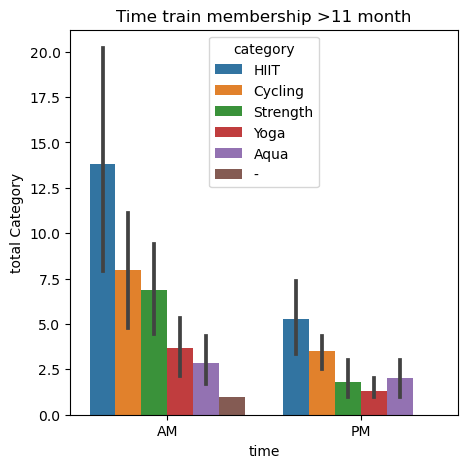

In [73]:
plt.figure(figsize=(5,5))
sns.barplot(data=data_fitness_member_attended_atleast_one,x="time",y='total Category',hue='category')
plt.title("Time train membership >11 month")
plt.show()